In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
np.random.seed(42)

# Portfolio Planner

In this activity, you will use the iedfinance api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [3]:
from iexfinance.stocks import get_historical_data
from iexfinance.refdata import get_symbols
import iexfinance as iex

In [21]:
# import os
# key = os.getenv('IEX_PUBLIC_KEY')
# print(type(key))
# key[-1]

In [22]:
# Return available tickers from API
tickers=pd.DataFrame(get_symbols(token=os.getenv('IEX_PUBLIC_KEY')))
tickers.head()

,currency,date,exchange,iexId,isEnabled,name,region,symbol,type
0,USD,2019-09-30,NYS,IEX_46574843354B2D52,True,Agilent Technologies Inc.,US,A,cs
1,USD,2019-09-30,NYS,IEX_4238333734532D52,True,Alcoa Corp.,US,AA,cs
2,USD,2019-09-30,PSE,IEX_474B433136332D52,True,Perth Mint Physical Gold ETF,US,AAAU,et
3,USD,2019-09-30,NAS,IEX_4E5434354A302D52,True,Altaba Inc.,US,AABA,cef
4,USD,2019-09-30,NYS,IEX_4843364642592D52,True,AAC Holdings Inc.,US,AAC,cs


In [23]:
type(tickers)

pandas.core.frame.DataFrame

# Data Collection

In this step, you will need to use the IEX api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [24]:
tickers = ["SPY", "AGG"]
# YOUR CODE HERE

# Set start and end datetimes of 1 year, between now and 365 days ago.
end_date = datetime.now()
start_date = end_date + timedelta(-365)

# Get 1 year's worth of historical data for AAPL
df = get_historical_data(tickers, start_date, end_date,  output_format='pandas', token = os.getenv('IEX_PUBLIC_KEY'))
df.head()

SPY                                        AGG                  \
              open    high     low   close     volume    open    high     low   
date                                                                            
2018-10-01  292.11  292.93  290.98  291.73   62078937  105.35  105.35  105.20   
2018-10-02  291.56  292.36  291.14  291.56   47258227  105.32  105.46  105.25   
2018-10-03  292.74  293.21  291.32  291.72   64694594  105.22  105.24  104.75   
2018-10-04  291.18  291.24  287.66  289.44  111545910  104.65  104.72  104.47   
2018-10-05  289.69  290.27  286.22  287.82  105951698  104.46  104.48  104.19   

                             
             close   volume  
date                         
2018-10-01  105.24  3517615  
2018-10-02  105.36  6912595  
2018-10-03  104.86  2540483  
2018-10-04  104.56  5268197  
2018-10-05  104.33  3460512

In [25]:
# Use the `drop` function with the `level` parameter to drop extra columns in the multi-index DataFrame
df.drop(columns=['open', 'high', 'low', 'volume'], level=1, inplace=True)
df.head()

,SPY,AGG
,close,close
date,,
2018-10-01,291.73,105.24
2018-10-02,291.56,105.36
2018-10-03,291.72,104.86
2018-10-04,289.44,104.56
2018-10-05,287.82,104.33


# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 100 iterations and generate at least 20 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 20 years

In [26]:
# Calculate the daily roi for the stocks
# YOUR CODE HERE
daily_returns = df.pct_change()
daily_returns.head()

# Use the `mean` function to calculate the mean of daily returns for `JNJ` and `MU`, respectively
# avg_daily_return_jnj = daily_returns.mean()['JNJ']['close']
# avg_daily_return_mu = daily_returns.mean()['MU']['close']
# avg_daily_return_mu

,SPY,AGG
,close,close
date,,
2018-10-01,NaN,NaN
2018-10-02,-0.000583,0.001140
2018-10-03,0.000549,-0.004746
2018-10-04,-0.007816,-0.002861
2018-10-05,-0.005597,-0.002200


In [37]:
# Calculate volatility
# YOUR CODE HERE
std_dev_daily_return_spy = daily_returns.std()['SPY']['close']
mean_daily_return_spy = daily_returns.mean()['SPY']['close']

std_dev_daily_return_agg = daily_returns.std()['AGG']['close']
mean_daily_return_agg = daily_returns.mean()['AGG']['close']

In [38]:
# Save the last day's closing price
# YOUR CODE HERE
spy_last_price = df['SPY']['close'][-1]
agg_last_price = df['AGG']['close'][-1]

In [39]:
# Setup the Monte Carlo Parameters
num_simulations = 100
num_trading_days = 252*20
monte_carlo = pd.DataFrame()

In [40]:
# YOUR CODE HERE
# Run the Monte Carlo Simulation

# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_price_df = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

# Run the simulation of projecting stock prices for the next trading year, `1000` times
for n in range(num_simulations):

    # Initialize the simulated prices list with the last closing price of `JNJ` and `MU`
    simulated_spy_prices = [spy_last_price]
    simulated_agg_prices = [agg_last_price]
    
    # Simulate the returns for 252 days
    for i in range(num_trading_days):
        
        # Calculate the simulated price using the last price within the list
        simulated_spy_price = simulated_spy_prices[-1] * (1 + np.random.normal(mean_daily_return_spy, std_dev_daily_return_spy))
        simulated_agg_price = simulated_agg_prices[-1] * (1 + np.random.normal(mean_daily_return_agg, std_dev_daily_return_agg))
        
        # Append the simulated price to the list
        simulated_spy_prices.append(simulated_spy_price)
        simulated_agg_prices.append(simulated_agg_price)
    
    # Append a simulated prices of each simulation to DataFrame
    simulated_price_df["SPY prices"] = pd.Series(simulated_spy_prices)
    simulated_price_df["AGG prices"] = pd.Series(simulated_agg_prices)
    
    # Calculate the daily returns of simulated prices
    simulated_daily_returns = simulated_price_df.pct_change()
    
    # Set the portfolio weights (60% SPY; 40% AGG)
    weights = [0.60, 0.40]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[n] = (1 + portfolio_daily_returns.fillna(0)).cumprod()

# Print records from the DataFrame
portfolio_cumulative_returns.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003242,0.995647,1.006458,0.994141,0.996919,1.003644,0.987945,0.987667,0.990605,1.001325,...,0.998623,1.003091,0.996022,0.998766,0.998655,0.991847,1.011221,1.004133,1.000637,1.003911
2,1.008770,0.991387,1.015257,0.993701,1.000172,1.005932,0.989673,0.998724,0.986413,1.000711,...,0.997455,1.000113,0.987406,0.995965,0.982189,0.999552,1.005239,1.017495,1.007219,1.011847
3,1.007260,0.991227,1.028336,1.003970,1.000953,1.012413,0.986659,0.997274,0.989674,0.995779,...,0.989031,0.992807,0.984589,0.998615,0.980087,0.986458,1.012325,1.018908,1.011628,1.011645
4,1.018200,0.993078,1.040074,0.999053,1.008796,1.015792,0.970661,1.012041,0.989176,0.983920,...,0.996060,0.990322,0.990038,0.994923,0.977648,0.992626,1.008234,1.014700,1.021506,1.013288


In [41]:
simulated_price_df.head()

,SPY prices,AGG prices
0,295.400000,113.140000
1,296.967119,113.346012
2,300.631012,113.488194
3,300.897389,113.280724
4,301.801543,113.230175


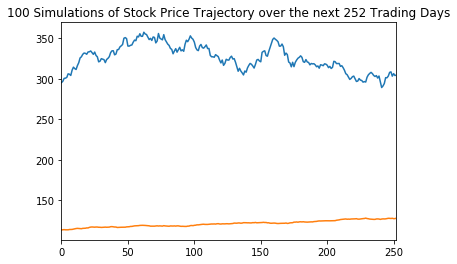

In [43]:
# Visualize the Simulation
# YOUR CODE HERE
plot_title = f"{n+1} Simulations of Stock Price Trajectory over the next 252 Trading Days"
simulated_price_df.plot(legend = None, title = plot_title)

In [44]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
# YOUR CODE HERE
ending_cumulative_returns = portfolio_cumulative_returns.iloc[-1, :]
ending_cumulative_returns.head()

0    1.046727
1    1.085085
2    1.298603
3    1.002290
4    0.964991
Name: 252, dtype: float64

In [77]:
# Select the last row for project stock prices (prices of each simulation on the last simulated trading day)
simulated_ending_prices = simulated_price_df.iloc[-1, :]
simulated_ending_prices.head()

SPY prices     193.572871
AGG prices    1367.304768
Name: 7560, dtype: float64

In [48]:
# Display the 90% confidence interval for the ending returns
# YOUR CODE HERE

# Use the `quantile` function to calculate the 95% confidence interval for simulated ending prices
simulated_ending_prices.value_counts(bins = 20) / len(simulated_ending_prices)
confidence_interval = ending_cumulative_returns.quantile(q=[0.025, 0.975])
confidence_interval

0.025    0.829106
0.975    1.254531
Name: 252, dtype: float64

In [66]:
simulated_price_df.head()

,SPY prices,AGG prices
0,295.400000,113.140000
1,296.967119,113.346012
2,300.631012,113.488194
3,300.897389,113.280724
4,301.801543,113.230175


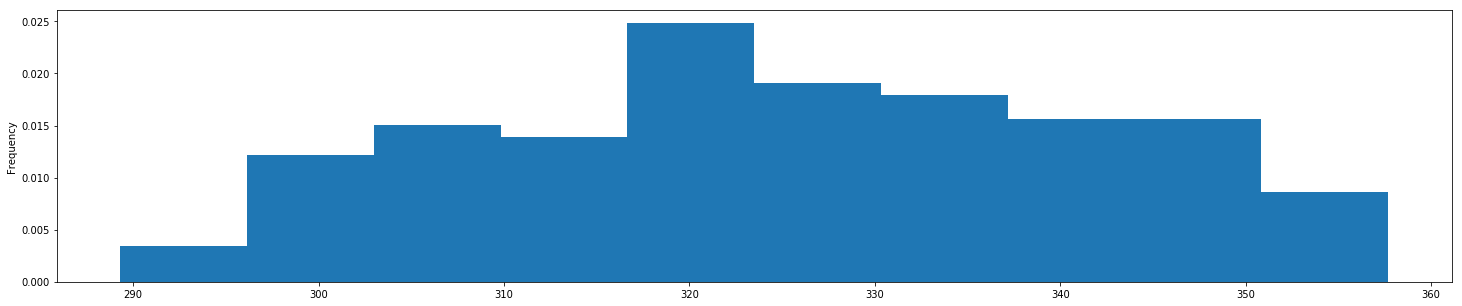

In [72]:
# Visualize the distribution of the ending returns
# YOUR CODE HERE
# simulated_ending_prices.plot(kind='hist', density = True, bins=8, figsize = (25,5))
simulated_price_df['SPY prices'].plot(kind='hist', density = True, figsize = (25,5))
# simulated_price_df['AGG prices'].plot(kind='hist', density = True, figsize = (25,5))

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [76]:
# YOUR CODE HERE
# Setup the Monte Carlo Parameters
num_simulations = 100
num_trading_days = 252*30
monte_carlo = pd.DataFrame()

# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_price_df = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

# Run the simulation of projecting stock prices for the next trading year, `1000` times
for n in range(num_simulations):

    # Initialize the simulated prices list with the last closing price of `JNJ` and `MU`
    simulated_spy_prices = [spy_last_price]
    simulated_agg_prices = [agg_last_price]
    
    # Simulate the returns for 252 days
    for i in range(num_trading_days):
        
        # Calculate the simulated price using the last price within the list
        simulated_spy_price = simulated_spy_prices[-1] * (1 + np.random.normal(mean_daily_return_spy, std_dev_daily_return_spy))
        simulated_agg_price = simulated_agg_prices[-1] * (1 + np.random.normal(mean_daily_return_agg, std_dev_daily_return_agg))
        
        # Append the simulated price to the list
        simulated_spy_prices.append(simulated_spy_price)
        simulated_agg_prices.append(simulated_agg_price)
    
    # Append a simulated prices of each simulation to DataFrame
    simulated_price_df["SPY prices"] = pd.Series(simulated_spy_prices)
    simulated_price_df["AGG prices"] = pd.Series(simulated_agg_prices)
    
    # Calculate the daily returns of simulated prices
    simulated_daily_returns = simulated_price_df.pct_change()
    
    # Set the portfolio weights (60% SPY; 40% AGG)
    weights = [0.60, 0.40]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[n] = (1 + portfolio_daily_returns.fillna(0)).cumprod()

# Print records from the DataFrame
portfolio_cumulative_returns.head() 
simulated_price_df.head()

,SPY prices,AGG prices
0,295.400000,113.140000
1,299.104177,113.381101
2,297.456471,113.477295
3,296.743113,113.241610
4,296.121273,112.959392


In [ ]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
# YOUR CODE HERE
ending_cumulative_returns = portfolio_cumulative_returns.iloc[-1, :]
ending_cumulative_returns.head()

In [ ]:
# Select the last row for project stock prices (prices of each simulation on the last simulated trading day)
simulated_ending_prices = simulated_price_df.iloc[-1, :]
simulated_ending_prices.head()

In [ ]:
# Display the 90% confidence interval for the ending returns
# YOUR CODE HERE

# Use the `quantile` function to calculate the 95% confidence interval for simulated ending prices
simulated_ending_prices.value_counts(bins = 20) / len(simulated_ending_prices)
confidence_interval = ending_cumulative_returns.quantile(q=[0.025, 0.975])
confidence_interval

### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [ ]:
# YOUR CODE HERE

# Calculate 95% confidence interval of an inital investment of 10,000 in the portfolio over the next 252 trading days
# # Set initial investment
initial_investment = 20000

# # Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
investment_pnl_lower_bound = initial_investment + (initial_investment * confidence_interval.iloc[0])
investment_pnl_upper_bound = initial_investment + (initial_investment * confidence_interval.iloc[1])
                                                    
# # Print the results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 252 trading days will end within in the range of"
      f" ${investment_pnl_lower_bound} and ${investment_pnl_upper_bound}")

### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [ ]:
# YOUR CODE HERE






### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [ ]:
# YOUR CODE HERE






### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [ ]:
# YOUR CODE HERE